In [1]:
import pandas as pd
import pyfolio
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [3]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [4]:
dji = pd.read_csv("data/^DJI.csv")
dji.shape
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [5]:
dji["daily_return"] = dji["Adj Close"].pct_change(1)

In [6]:
dow_strat  = backtest_strat(dji)
dow_strat.head()

Date
2009-01-02 00:00:00+00:00         NaN
2009-01-05 00:00:00+00:00   -0.009054
2009-01-06 00:00:00+00:00    0.006949
2009-01-07 00:00:00+00:00   -0.027221
2009-01-08 00:00:00+00:00   -0.003106
dtype: float64

<AxesSubplot:>

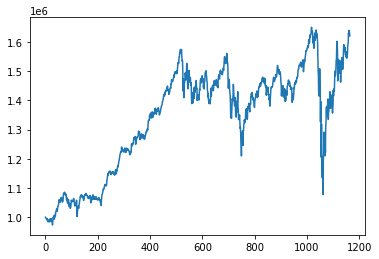

In [7]:
#strat_df = pd.read_csv("test_NN/advanced/account_value_validation_PPO_bayn.csv")
strat_df = pd.read_csv("results/account_value_trade_PPO.csv")
strat_df = pd.DataFrame({'account_value': strat_df['0']})
strat_df.account_value.plot()

In [8]:
strat_df = get_daily_return(strat_df)
strat_df.head(4)
strat_df["Date"] = dji["Date"]

Sharpe:  0.6105008795102526


In [9]:
strat_df = backtest_strat(strat_df)
strat_df.head()

Date
2009-01-02 00:00:00+00:00         NaN
2009-01-05 00:00:00+00:00   -0.000520
2009-01-06 00:00:00+00:00   -0.001741
2009-01-07 00:00:00+00:00   -0.002460
2009-01-08 00:00:00+00:00   -0.001714
dtype: float64

c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-02
End date,2013-08-16
Total months,55
,Backtest
Annual return,11.013%
Cumulative returns,62.028%
Annual volatility,20.645%
Sharpe ratio,0.61
Calmar ratio,0.32
Stability,0.68
Max drawdown,-34.683%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.68,2013-01-17,2013-03-22,NaT,NaN
1,23.15,2011-01-20,2011-12-21,2012-12-20,501
2,7.65,2009-04-20,2009-06-26,2009-11-13,150
3,2.62,2009-01-02,2009-02-11,2009-02-17,33
4,2.29,2010-06-03,2010-06-11,2010-07-20,34


c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.11%,-0.88%,1.58%
Fukushima,0.00%,-3.16%,2.69%
EZB IR Event,-0.08%,-1.80%,1.43%
2009Q1,0.01%,-1.15%,1.16%
2009Q2,0.08%,-1.21%,1.46%
Flash Crash,0.40%,-0.11%,1.09%
GFC Crash,0.11%,-1.15%,1.46%
Recovery,0.05%,-4.23%,5.48%
New Normal,0.05%,-12.92%,11.09%


c:\Users\domin\anaconda3\envs\trading\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


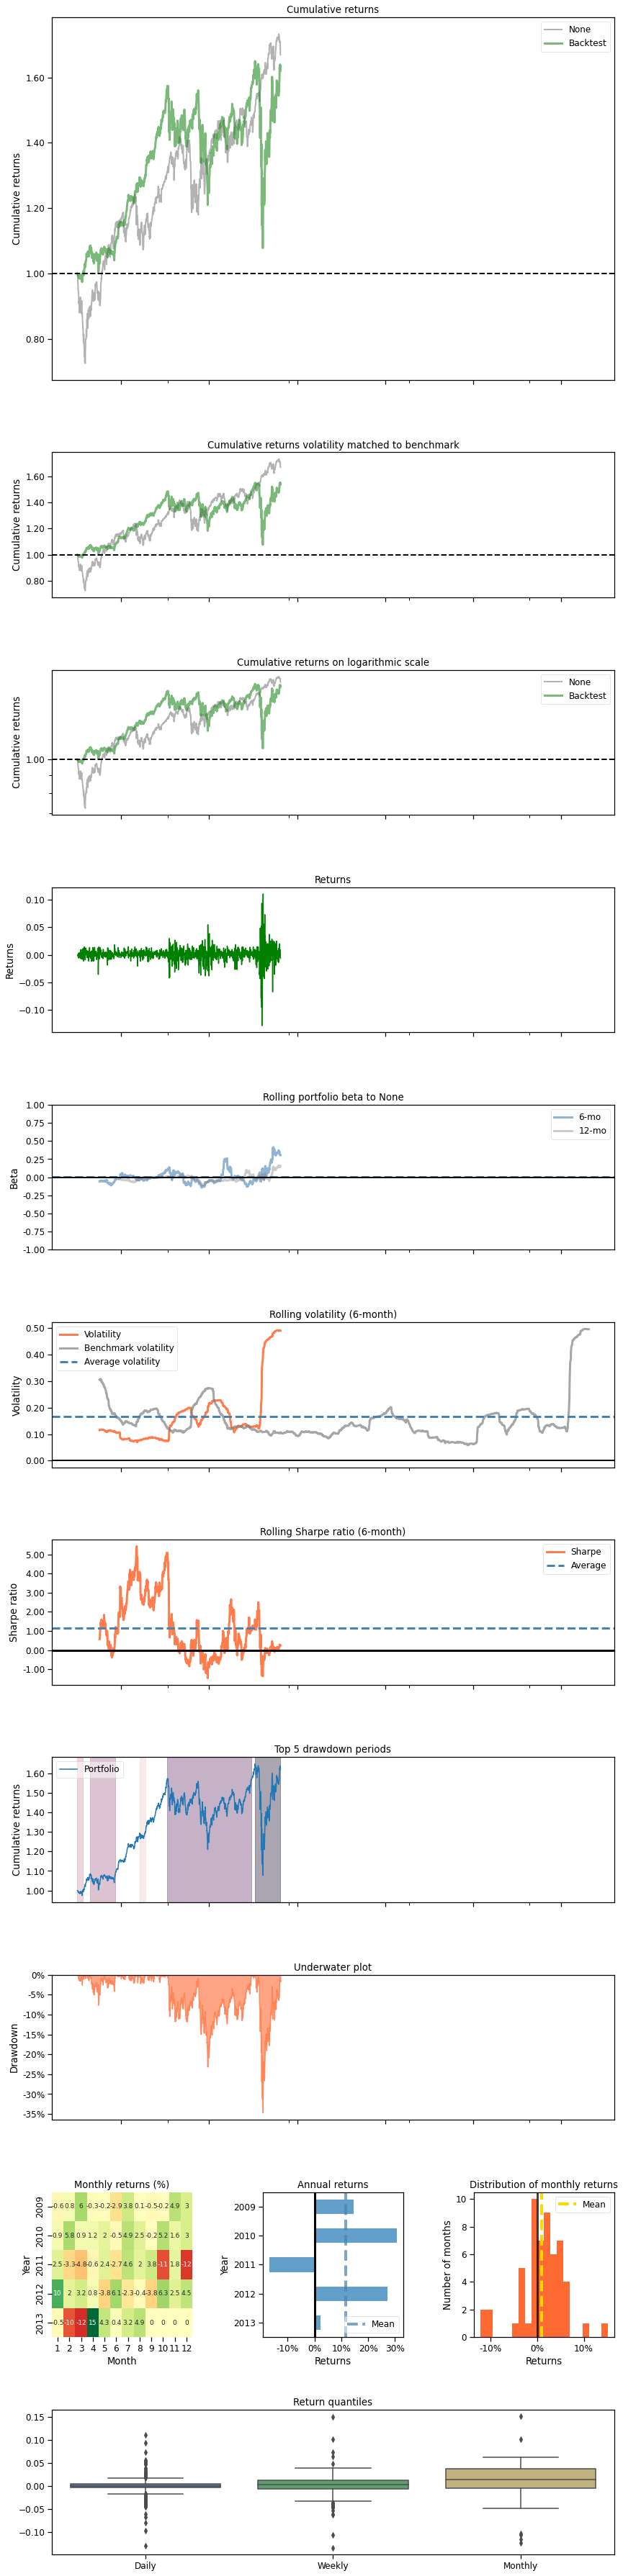

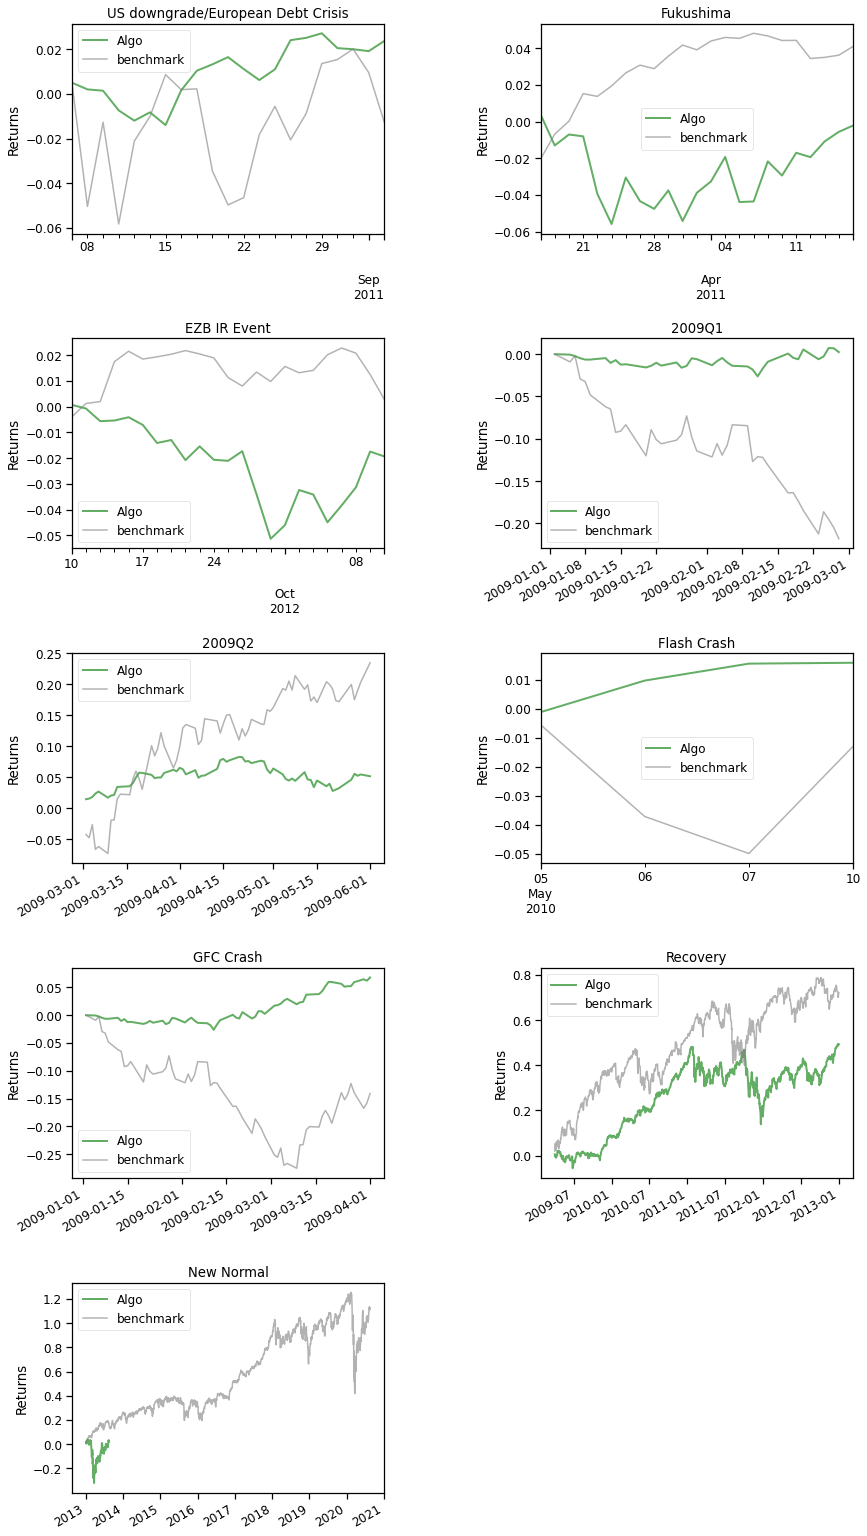

In [10]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = strat_df,
                                   benchmark_rets=dow_strat, set_context=False)